# STOCK PREDICTION USING DEEP LEARNING

##Introduction

Prediction of stock prices is one of the most researched topics and gathers interest
from academia and the industry alike. With the emergence of Artificial Intelligence, various
algorithms have been employed in order to predict the equity market movement. The combined
application of statistics and machine learning algorithms have been designed either for predicting
the opening price of the stock the very next day or understanding the long term market in the
future.

<img src= https://static.packt-cdn.com/products/9781788997454/graphics/assets/82d2422a-194a-432b-ba95-c5cb07a2f637.png>


# A CRISP DM approach.

1. Business Understanding and Problem Statement

- As a layman knowledge of investing in a stock or any type of investment is always a challenge.
- When it comes to investment in a high volume maket with a fluctuating economy and high stakes, people tend to question their decision of even thinking of Investing.
- However, with the right experience in life one can make a better decision in the future and that is what all Supervised Machine and Deep learning algorithms are all about.
- Hence we Sunil Gauda (ID: ), Swaraj Shaw (ID: 10592394), Anjali (ID: 10592521) and Kenneth Dsilva (ID: 10600644) have created 5 simple models based on the top 6 companies using Deep Learning to predict the future stock of a company based on its past 60 day trend of its opening price along with other factors. 

### IMPORTING LIBRARIES

- We will be using the Keras and Tensorflow libraries to execute our Models
- Our data will be scaled using the MinMax Scalar.
- We random seed our tensorflow by 7
- And visualizing and datahandling is done by CandleStick and Pandas with Numpy


In [ ]:
!pip install pysimplegui

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 509 kB 23.1 MB/s 


In [ ]:
!pip install pykalman

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 228 kB 16.7 MB/s 
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48462 sha256=8384ff537136c88ad8745848f03db093ae3ac80a32afb1b5dad75369752d9d53
  Stored in directory: /root/.cache/pip/wheels/6a/04/02/2dda6ea59c66d9e685affc8af3a31ad3a5d87b7311689efce6
Successfully built pykalman


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,Dropout
from sklearn.metrics import accuracy_score
from tensorflow.keras import datasets, layers,models
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Activation,SimpleRNN
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from pykalman import KalmanFilter
import PySimpleGUI as sg
import plotly.graph_objects as go
from datetime import datetime
tf.random.set_seed(7)

# Data Understanding.

##READING AND ANALYSING THE DATA.

To Understand the data and the Data fluctuations we will display each dataset in the form of a graph to visually aid our users.

- We plot the Kalman Filtered Price fluctuations using Candlestick
- The plots are about the Closing Price of our data that we are set out to predict(Target Data)

Dataset
- Date - Day of the trade
- Open: The starting price for a given trading day
- Close: The final price on that day
- High: The highest prices at which the stock traded on that day
- Low: The lowest prices at which the stock traded on that day
- Adj Close: Ending or closing price of the stock which was changed to contain any corporations’ actions and distribution that is occurred during trade time of the day
- Volume: The total number of shares traded before the market closed on
that day

In [ ]:
def price_fluct(company):
    
        kf = KalmanFilter(transition_matrices = [1], observation_matrices = [1], initial_state_mean = 0, 
                         initial_state_covariance = 1, observation_covariance = 1,transition_covariance = 0.0001)
        mean, cov = kf.filter(company['Adj Close'].values)
        mean, std = mean.squeeze(), np.std(cov.squeeze())
        plt.figure(figsize=(12,6))
        plt.plot(company['Adj Close'].values - mean, 'red', lw=1.5)
        plt.xticks(range(0,company.shape[0],500),company['Date'].loc[::500],rotation=45)
        plt.title("Kalman filtered price fluctuation")
        plt.ylabel("Deviation from the mean ($)")
        plt.xlabel("Days")

def candlestick_viz(company):
    
    fig = go.Figure(data=[go.Candlestick(x=Facebook['Date'],open=Facebook['Open'],high=Facebook['High'],
                low=Facebook['Low'], close=Facebook['Close'])])

    fig.show()
    

In [ ]:
Facebook = pd.read_csv('./dataset/Facebook.csv')
Facebook

,Date,Open,High,Low,Close,Adj Close,Volume
0,5/18/2012,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,5/21/2012,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,5/22/2012,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,5/23/2012,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,5/24/2012,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...,...
2222,3/19/2021,281.220001,292.799988,281.200012,290.109985,290.109985,38905100
2223,3/22/2021,290.450012,299.709992,286.750000,293.540008,293.540008,28273100
2224,3/23/2021,293.149994,298.000000,289.809998,290.630005,290.630005,23000900
2225,3/24/2021,291.000000,291.720001,281.160004,282.140015,282.140015,18675000


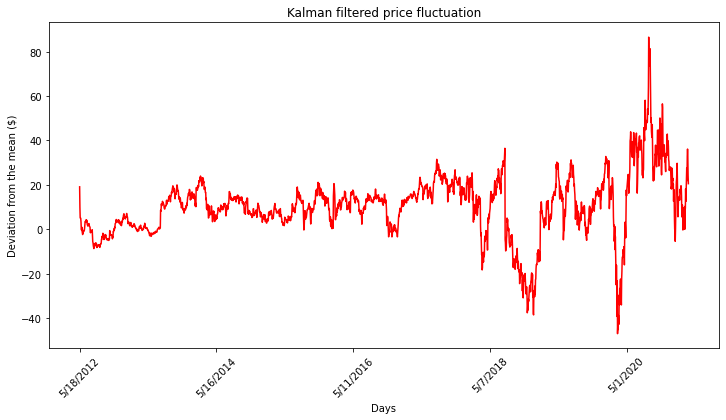

In [ ]:
price_fluct(Facebook)

In [ ]:
candlestick_viz(Facebook)

In [ ]:
Amazon = pd.read_csv('./dataset/Amazon.csv')
Amazon

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,219.410004,219.630005,212.809998,213.850006,213.850006,5231700
1,2012-05-21,214.029999,219.979996,212.820007,218.110001,218.110001,3579800
2,2012-05-22,218.309998,218.869995,213.960007,215.330002,215.330002,3733100
3,2012-05-23,214.710007,217.550003,211.179993,217.279999,217.279999,4243800
4,2012-05-24,216.979996,217.660004,212.699997,215.240005,215.240005,3141100
...,...,...,...,...,...,...,...
2222,2021-03-19,3029.229980,3077.290039,3016.629883,3074.959961,3074.959961,4616400
2223,2021-03-22,3067.850098,3126.580078,3060.050049,3110.870117,3110.870117,2902200
2224,2021-03-23,3127.000000,3182.000000,3120.850098,3137.500000,3137.500000,3817300
2225,2021-03-24,3151.040039,3160.310059,3085.149902,3087.070068,3087.070068,2959000


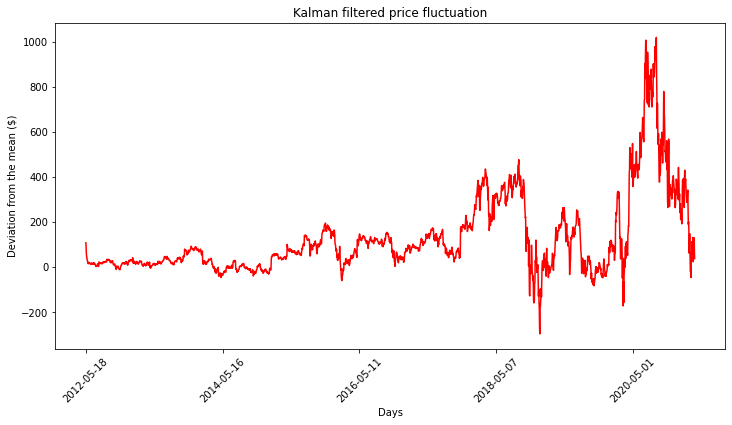

In [ ]:
price_fluct(Amazon)

In [ ]:
candlestick_viz(Amazon)

In [ ]:
Apple = pd.read_csv('./dataset/Apple.csv')
Apple

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,19.070000,19.407499,18.649286,18.942142,16.288403,732292400
1,2012-05-21,19.089287,20.055000,19.073214,20.045713,17.237370,631106000
2,2012-05-22,20.341070,20.495714,19.735001,19.891787,17.105009,694870400
3,2012-05-23,19.910713,20.457144,19.758215,20.377144,17.522364,584897600
4,2012-05-24,20.566786,20.589287,20.043928,20.190001,17.361441,496230000
...,...,...,...,...,...,...,...
2222,2021-03-19,119.900002,121.430000,119.680000,119.989998,119.786530,185549500
2223,2021-03-22,120.330002,123.870003,120.260002,123.389999,123.180771,111912300
2224,2021-03-23,123.330002,124.239998,122.139999,122.540001,122.332214,95467100
2225,2021-03-24,122.820000,122.900002,120.070000,120.089996,119.886360,88530500


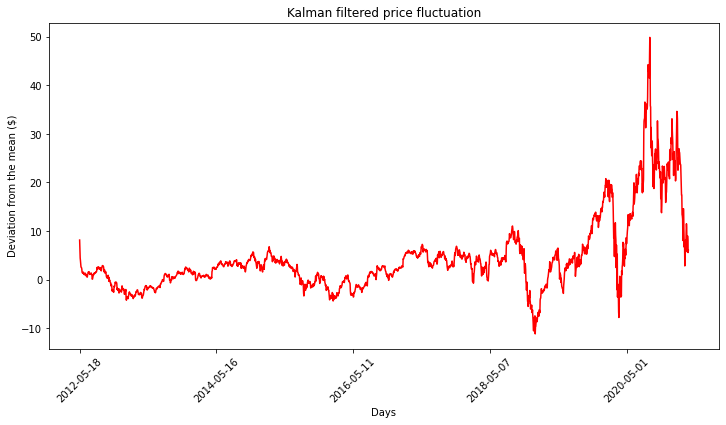

In [ ]:
price_fluct(Apple)

In [ ]:
candlestick_viz(Apple)

In [ ]:
Netflix = pd.read_csv('./dataset/Netflix.csv')
Netflix

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,10.328571,10.392857,9.337143,9.994286,9.994286,29415400
1,2012-05-21,9.978571,10.312857,9.650000,10.248571,10.248571,25143300
2,2012-05-22,10.257143,10.342857,9.607143,9.672857,9.672857,40014800
3,2012-05-23,9.638571,10.307143,9.595714,10.272857,10.272857,44100000
4,2012-05-24,10.217143,10.241429,9.928571,10.038571,10.038571,20742400
...,...,...,...,...,...,...,...
2222,2021-03-19,504.959991,513.190002,501.630005,512.179993,512.179993,4386400
2223,2021-03-22,509.130005,529.309998,509.130005,523.109985,523.109985,3360600
2224,2021-03-23,529.869995,543.119995,529.400024,535.090027,535.090027,5583500
2225,2021-03-24,533.780029,534.419983,520.000000,520.809998,520.809998,4102200


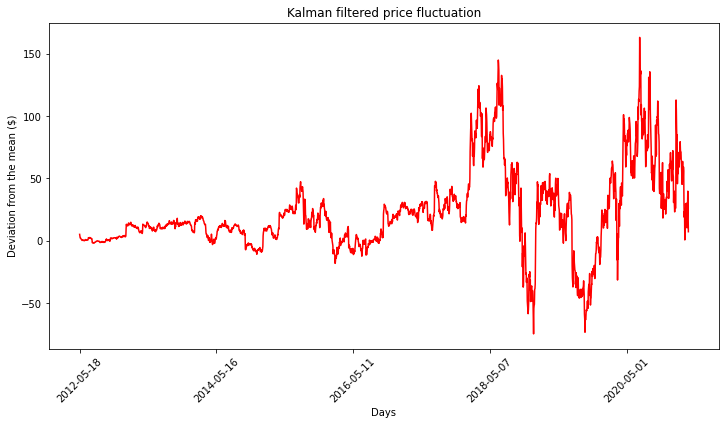

In [ ]:
price_fluct(Netflix)

In [ ]:
candlestick_viz(Netflix)

In [ ]:
Google = pd.read_csv('./dataset/Google.csv')
Google

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,311.382874,315.029205,297.235901,299.078979,299.078979,11991780
1,2012-05-21,299.133759,306.695435,298.879730,305.908386,305.908386,6173855
2,2012-05-22,305.574646,305.758942,296.887207,299.278229,299.278229,6126679
3,2012-05-23,299.701660,303.661804,297.445099,303.592072,303.592072,6380025
4,2012-05-24,303.442627,304.817474,298.316833,300.702881,300.702881,3796778
...,...,...,...,...,...,...,...
2222,2021-03-19,2042.050049,2053.100098,2017.680054,2043.199951,2043.199951,2314900
2223,2021-03-22,2041.839966,2057.989990,2026.069946,2038.589966,2038.589966,1954800
2224,2021-03-23,2051.699951,2072.302002,2039.219971,2052.959961,2052.959961,1367000
2225,2021-03-24,2065.370117,2078.209961,2041.555054,2045.060059,2045.060059,1154000


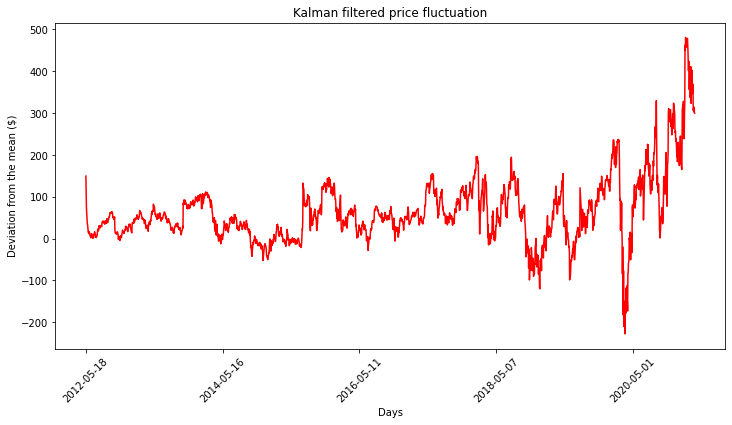

In [ ]:
price_fluct(Google)

In [ ]:
candlestick_viz(Google)

In [ ]:
Tesla = pd.read_csv('./dataset/TSLA.csv')
Tesla

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,5.674000,5.692000,5.366000,5.512000,5.512000,8082500
1,2012-05-21,5.516000,5.852000,5.424000,5.754000,5.754000,7376000
2,2012-05-22,6.020000,6.268000,6.000000,6.160000,6.160000,11831000
3,2012-05-23,6.112000,6.210000,5.900000,6.204000,6.204000,6102000
4,2012-05-24,6.250000,6.250000,5.938000,6.056000,6.056000,5378000
...,...,...,...,...,...,...,...
2555,2022-07-15,720.000000,730.869995,710.669983,720.200012,720.200012,23165500
2556,2022-07-18,734.809998,751.549988,718.809998,721.640015,721.640015,27512500
2557,2022-07-19,735.000000,741.419983,710.929993,736.590027,736.590027,26963400
2558,2022-07-20,740.349976,751.989990,730.450012,742.500000,742.500000,29621400


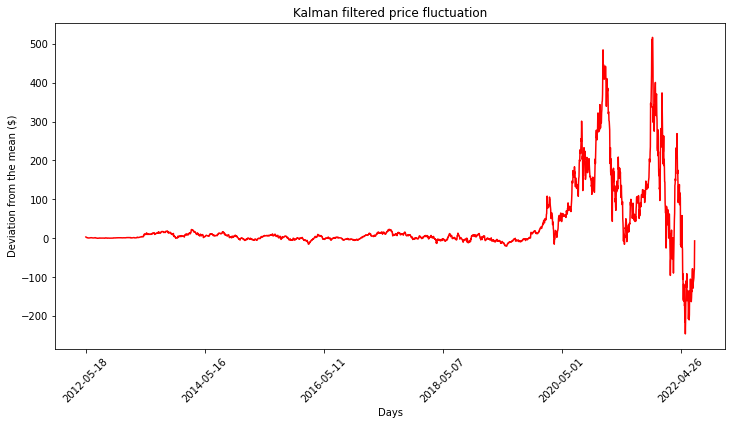

In [ ]:
price_fluct(Tesla)

In [ ]:
candlestick_viz(Tesla)

# Plotting all the datasets Closing Price togeather.

Text(0, 0.5, 'Closing Price')

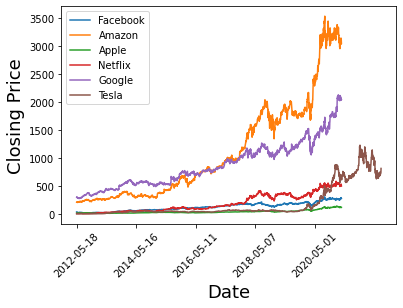

In [ ]:
# Plotting the raw closing prices of all the companies from 2012 till March 2021
plt.plot(range(Facebook.shape[0]),(Facebook['Close']))
plt.plot(range(Amazon.shape[0]),(Amazon['Close']))
plt.plot(range(Apple.shape[0]),(Apple['Close']))
plt.plot(range(Netflix.shape[0]),(Netflix['Close']))
plt.plot(range(Google.shape[0]),(Google['Close']))
plt.plot(range(Tesla.shape[0]),(Tesla['Close']))

plt.xticks(range(0,Apple.shape[0],500),Apple['Date'].loc[::500],rotation=45)

plt.legend(["Facebook","Amazon","Apple","Netflix","Google","Tesla"])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing Price',fontsize=18)

#Modelling and Data Preparation.

The Data Provided to us is fairly simple and needs not much datapreparation as it is all continuous variables.

- Being a regressive problem for a continuous output variable, the task of data preparation is fairly unnecessary.
- However, to reduce the possibility of outliers and yet to help them to make a significant effect we scale the data using Min-Max Scalar ie scaling to (0,1).
- We use only the CLOSE prices of the day for our predictions hence we use it as our input variable.

### DEEP LEARNING MODELS

We have choosen 4 basic Deep Learning Models namely:

- LSTM (Long Short Term Memory)
- Simple RNN (Recurernt Neural Network)
- Simple ANN (Artificial Neural Network)
- MLP (Multilevel Perceptron)

The detailed implementation of each layer and network is mentioned below.

Note:

- As the data is highly time dependent we havent used a random split instead we have used 90% of the data for Training and 10% for the test.

- To avoid overfitting we have also added in dropout layers in the models.

- Our measure of merit is R2 Score and accuracy that is mentioned towards the end.

- We have employed the Adam Optimiser as it is the most used and it uses stochastic gradient method, requires no external tuning and as our dataset is pretty large it is more efficient being light weight.

- To full proof our findings we have also included the MSLE (Mean Sqaured Logarithmic Error) that gives us the meature of th erations between the true and predicted values.

 "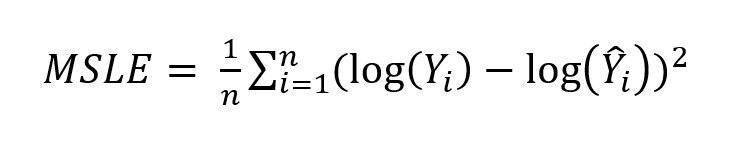"


##Model Architecture:

### Background:
##1. LSTM Model:
- Long short-term memory (LSTM) is an artificial RNN architecture proposed in 1997 by Sepp Hochreiter and Jurgen schmidhuber. Unlike standard feed-forward neural networks, LSTM has feedback connections. It can process not only Images but also streams of datapoints like Videos and Speech.

Long short-term memory

<img src= https://static.javatpoint.com/tutorial/tensorflow/images/long-short-term-memory-rnn-in-tensorflow.jpg>


##2. ANN: Artificial Neural Networks
- The idea of ANNs is based on the belief that working of the human brain by making the right connections can be imitated using silicon and wires as living neurons and dendrites.

- The human brain is composed of 86 billion nerve cells called neurons. They are connected to other thousand cells by Axons. Stimuli from the external environment or inputs from sensory organs are accepted by dendrites. These inputs create electric impulses, which quickly travel through the neural network. A neuron can then send the message to another neuron to handle the issue or does not send it forward. ANNs are composed of multiple nodes, which imitate biological neurons of the human brain. The neurons are connected by links and they interact with each other. The nodes can take input data and perform simple operations on the data. The result of these operations is passed to other neurons. The output at each node is called its activation or node value. Each link is associated with weight. ANNs are capable of learning, which takes place by altering weight values.

- Perceptron is a single layer neural network. It is a binary classifier and part of supervised learning. A simple model of the biological neuron in an artificial neural network is known as the perceptron.


##3. MLP:
- MLP is a type of artificial neural network (ANN). Simplest MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer.
- A Multi-layer Perceptron (MLP) Regression System is a multilayer feedforward neural network training system that implements multi-layer perceptron regression algorithm to solve a Multi-layer Perceptron Regression Task.

##4. RNN:

- In a feedforward networks (such as vanilla neural networks and CNNs),
data moves one way, from the input layer to the output layer. In RNNs, the recurrent architecture allows data to circle back to the input layer. This means that data is not limited to a feedforward direction. Specifically, in a hidden layer of an RNN, the output from the previous time point will become part of the input for the current time point
- RNNs work well with sequential data, including time series (such as daily temperatures, daily product sales, and clinical EEG recordings) and general consecutive data with order such as words in a sentence, DNA sequences, and so on.

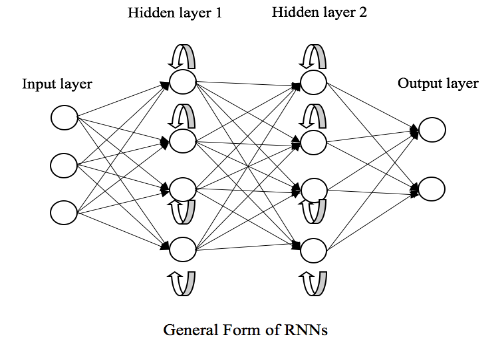

### Mathematical Explanation:
## 1. LSTM Model:
A long short-term memory (LSTM) network is a type of RNN model that avoids the vanishing gradient problem by adding 'forget' gates.

- Input gate- It discover which value from input should be used to modify the memory. Sigmoid function decides which values to let through 0 or 1. And tanh function gives weightage to the values which are passed, deciding their level of importance ranging from -1 to 1.

<img src= https://static.javatpoint.com/tutorial/tensorflow/images/long-short-term-memory-rnn-in-tensorflow2.png>

- Forget gate- It discover the details to be discarded from the block. A sigmoid function decides it. It looks at the previous state (ht-1) and the content input (Xt) and outputs a number between 0(omit this) and 1(keep this) for each number in the cell state Ct-1.

<img src=https://static.javatpoint.com/tutorial/tensorflow/images/long-short-term-memory-rnn-in-tensorflow3.png>


- Output gate- The input and the memory of the block are used to decide the output. Sigmoid function decides which values to let through 0 or 1. And tanh function decides which values to let through 0, 1. And tanh function gives weightage to the values which are passed, deciding their level of importance ranging from -1 to 1 and multiplied with an output of sigmoid.

<img src=https://static.javatpoint.com/tutorial/tensorflow/images/long-short-term-memory-rnn-in-tensorflow4.png>

## 2. ANN:

- Perceptron model

  <img src=https://static.javatpoint.com/tutorial/tensorflow/images/artificial-neural-network-in-tensorflow-1.png>

- Multi Layer Perceptron Model
  <img src=https://miro.medium.com/max/860/1*WUcH8RFLAoGFacURtonphA.png>

There are two Artificial Neural Network topologies − FeedForward and Feedback.

 - Feed Forward Neural Network 
  - In this ANN, the information flow is unidirectional. A unit sends information to another unit from which it does not receive any information. There are no feedback loops. They are used in pattern generation/recognition/classification. They have fixed inputs and outputs.

 <img src=https://miro.medium.com/max/664/1*7tJuwHIyruu-ZUOBM6A71g.png>



 - FeedBack ANN
  - Here, feedback loops are allowed. They are used in content-addressable memories.

 <img src=https://miro.medium.com/max/592/1*az3YJ0y3WbbVpv_U7Y0N4A.png>

 ### Activation Functions

 - the input, x, is of n dimensions and the hidden layer is composed
of H hidden units. The weight matrix, W(1), connecting the input and hidden layer is of size n by H, where each column, 𝑤ℎ(1) , represents the coefficients associating the input with the h-th hidden unit. The output (also called activation) of the hidden layer can be expressed mathematically as follows: 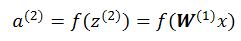

- The logistic (sigmoid) function where the output value is in the range
of (0, 1)

- The tanh function plot where the output value is in the range of (-1, 1)

- The ReLU function plot where the output value is in the range of (0, +inf)

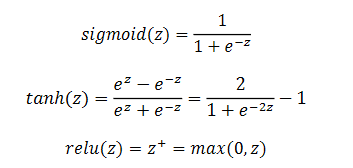





## 3. MLP:
- Multi-Layer perceptron defines the most complex architecture of artificial neural networks. It is substantially formed from multiple layers of the perceptron. 
A multilayer perceptron (MLP) is a feed forward artificial neural network that generates a set of outputs from a set of inputs. An MLP is characterized by several layers of input nodes connected as a directed graph between the input nodes connected as a directed graph between the input and output layers. MLP uses backpropagation for training the network. MLP is a deep learning method

<img src=https://static.javatpoint.com/tutorial/tensorflow/images/multi-layer-perceptron-in-tensorflow.png>

<img src=https://pabloinsente.github.io/assets/post-7/forward-pass.png>

## 4. RNN: 
- A recurrent neural network (RNN) is a kind of artificial neural network mainly used in speech recognition and natural language processing (NLP). RNN is used in deep learning and in the development of models that imitate the activity of neurons in the human brain.

- Recurrent Networks are designed to recognize patterns in sequences of data, such as text, genomes, handwriting, the spoken word, and numerical time series data emanating from sensors, stock markets, and government agencies.

- A recurrent neural network looks similar to a traditional neural network except that a memory-state is added to the neurons. The computation is to include a simple memory.

 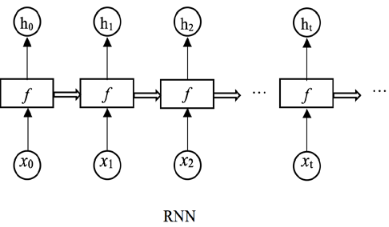

 RNN Forward Pass:

 <img src=https://miro.medium.com/max/558/1*55c3opV_tqm3wUwcj0m-jg.png>

### TRAINING AND TESTING THE MODEL

In [ ]:
class stock_predict_DL:
    
    def __init__(self,comp_df):

        data = comp_df.filter(['Open'])
        dataset = data.values


        training_data_len = int(np.ceil( len(dataset) * 0.90 ))

        self.scaler = MinMaxScaler(feature_range=(0,1))
        scaled_data = self.scaler.fit_transform(dataset)

        train_data = scaled_data[0:int(training_data_len), :]

        self.X_train = []
        self.y_train = []
        
        # We are taking predicting the open price of a given day based on the trend in the previous 60 days
        for i in range(60, len(train_data)):
            self.X_train.append(train_data[i-60:i, 0])
            self.y_train.append(train_data[i, 0])

        self.X_train, self.y_train = np.array(self.X_train), np.array(self.y_train)


        test_data = scaled_data[training_data_len - 60: , :]
        # Create the data sets self.X_test and self.y_test
        self.X_test = []

        self.y_test = dataset[training_data_len:, :]
        for i in range(60, len(test_data)):
            self.X_test.append(test_data[i-60:i, 0])

        self.X_test = np.array(self.X_test)
        test_dates = comp_df['Date'].values
        self.testd = test_dates[training_data_len:] # stores the test dates

        self.model_score = []
        
    def LSTM_model(self):
        
        print("Long Short-Term Memory (LSTM)")
        # Reshape the data
        Xtrain = np.reshape(self.X_train, (self.X_train.shape[0], self.X_train.shape[1], 1))
        # Reshape the data
        Xtest = np.reshape(self.X_test, (self.X_test.shape[0], self.X_test.shape[1], 1 ))
        # Build the LSTM model
        model=Sequential()
        model.add(LSTM(50,return_sequences=True,input_shape=(Xtrain.shape[1], 1)))
        model.add(LSTM(50,return_sequences=True))
        model.add(LSTM(50))
        model.add(Dense(1))
        # We are adding dropout to reduce overfitting
        model.summary() 
        # Compile the model
        model.compile(optimizer='adam', loss='mean_squared_error')
        # Train the model
        model.fit(Xtrain, self.y_train, batch_size=32, epochs= 100)
         # Get the models predicted price values 
        predictions = model.predict(Xtest)
        # We need to inverse transform the scaled data to compare it with our unscaled y_test data
        predictions = self.scaler.inverse_transform(predictions)
        print("R2 SCORE")
        print(metrics.r2_score(self.y_test, predictions))
        self.model_score.append(["LSTM",metrics.r2_score(self.y_test, predictions)])
        # Mean squared logarithmic error (MSLE) can be interpreted as a measure of the
        # ratio between the true and predicted values.
        print("MSLE")
        print(metrics.mean_squared_log_error(self.y_test, predictions))
        plt.plot(predictions)
        plt.plot(self.y_test)
        plt.legend(["Predicted","Observed"])
        plt.xticks(range(0,len(self.y_test),50),self.testd,rotation=45)
        plt.xlabel('Date',fontsize=18)
        plt.ylabel('Price',fontsize=18)
        plt.title("LSTM")
        model.save('./models/lstm_model.h5')


    def basic_ann_model(self):
        
        print("Basic Artificial Neural Network (ANN)")
        classifier = Sequential()
        classifier.add(Dense(units = 128, activation = 'relu', input_dim = self.X_train.shape[1]))
        classifier.add(Dropout(0.2))
        classifier.add(Dense(units = 64))
        classifier.add(Dropout(0.2))
        classifier.add(Dense(units = 1))
        classifier.summary() 
        classifier.compile(optimizer = 'adam', loss = 'mean_squared_error')
        classifier.fit(self.X_train, self.y_train, batch_size = 32, epochs = 100)
        # Predicting the prices
        prediction = classifier.predict(self.X_test)
        y_pred = self.scaler.inverse_transform(prediction)
        print("R2 SCORE")
        print(metrics.r2_score(self.y_test, y_pred))
        # Appending the R2 score
        self.model_score.append(["ANN",metrics.r2_score(self.y_test, y_pred)])
        print("MSLE")
        print(metrics.mean_squared_log_error(self.y_test, y_pred))
        plt.plot(y_pred)
        plt.plot(self.y_test)
        plt.legend(["Predicted","Observed"])
        plt.xticks(range(0,len(self.y_test),50),self.testd,rotation=45)
        plt.xlabel('Date',fontsize=18)
        plt.ylabel('Price',fontsize=18)
        plt.title("ANN")
        classifier.save('./models/ann_model.h5')

        
    def Mlp_model(self):
        
        print("Multilayer perceptron (MLP)")
        # We are using MLPRegressor as the problem at hand is a regression problem
        regr = MLPRegressor(hidden_layer_sizes = 100, alpha = 0.01,solver = 'lbfgs',shuffle=True)
        regr.fit(self.X_train, self.y_train)
        # predicting the price
        y_pred = regr.predict(self.X_test)
        y_pred = y_pred.reshape(len(y_pred),1)
        y_pred = self.scaler.inverse_transform(y_pred)
        print("R2 SCORE")
        print(metrics.r2_score(self.y_test, y_pred))
        # Appending the model score and printing the mean squared log error
        self.model_score.append(["MLP",metrics.r2_score(self.y_test, y_pred)])
        print("MSLE")
        print(metrics.mean_squared_log_error(self.y_test, y_pred))
        plt.plot(y_pred)
        plt.plot(self.y_test)
        plt.legend(["Predicted","Observed"])
        plt.xticks(range(0,len(self.y_test),50),self.testd,rotation=45)
        plt.xlabel('Date',fontsize=18)
        plt.ylabel('Price',fontsize=18)
        plt.title("MLP")

        
 
    def rnn_model(self):
        
        print("Recurrent neural network (RNN)")
        # Reshape the data
        Xtrain = np.reshape(self.X_train, (self.X_train.shape[0], self.X_train.shape[1], 1))
        # Reshape the data
        Xtest = np.reshape(self.X_test, (self.X_test.shape[0], self.X_test.shape[1], 1 ))
        model = Sequential()
        model.add(SimpleRNN(units=4, input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
        model.add(Dense(1))
        model.summary()
        model.compile(loss='mean_squared_error', optimizer='adam')
        model.fit(Xtrain, self.y_train, epochs=5, batch_size=32)
        # predicting the opening prices
        prediction = model.predict(Xtest)
        y_pred = self.scaler.inverse_transform(prediction)
        print("R2 SCORE")
        # Appending the R2 score
        print(metrics.r2_score(self.y_test, y_pred))
        self.model_score.append(["RNN",metrics.r2_score(self.y_test, y_pred)])
        print("MSLE")
        print(metrics.mean_squared_log_error(self.y_test, y_pred))
        plt.plot(y_pred)
        plt.plot(self.y_test)
        plt.legend(["Predicted","Observed"])
        plt.xticks(range(0,len(self.y_test),50),self.testd,rotation=45)
        plt.xlabel('Date',fontsize=18)
        plt.ylabel('Price',fontsize=18)
        plt.title("RNN")
        model.save('./models/rnn_model.h5')

        
    def best_model(self):
        print(self.model_score)
        Dict = {item[0]: item[1:][0] for item in self.model_score}
        keys = list(Dict.keys()) # creating a list of Dict keys
        vals = list(Dict.values()) # creating a list of Dict values
        print("The best model is ",keys[vals.index(max(vals))]) # getting the model with the highest accuracy
        print("Accuracy of ",keys[vals.index(max(vals))],'is',max(vals)) #getting the accuracy of the best model

    def save_pred(self, model_name):
      if model_name == 'LSTM':

        model = load_model('./models/lstm_model.h5')
        print(self.X_test)
        Xtest = np.reshape(self.X_test, (self.X_test.shape[0], self.X_test.shape[1], 1 ))
        predictions = model.predict(Xtest)
        predictions = self.scaler.inverse_transform(predictions)
        print(predictions)

      elif model_name =='ANN':

        model = load_model('./models/ann_model.h5')
        print(self.X_test)
        Xtest = np.reshape(self.X_test, (self.X_test.shape[0], self.X_test.shape[1], 1 ))
        predictions = model.predict(Xtest)
        predictions = self.scaler.inverse_transform(predictions)
        print(predictions)

      else:

        model = load_model('./models/rnn_model.h5')
        print(self.X_test)
        Xtest = np.reshape(self.X_test, (self.X_test.shape[0], self.X_test.shape[1], 1 ))
        predictions = model.predict(Xtest)
        predictions = self.scaler.inverse_transform(predictions)
        print(predictions)

## Choosing the data and Calling the model

In [ ]:
filepath = './dataset/TSLA.csv'
folder = './dataset/'
# reading the csv file that was selected and printing the file name 
data = pd.read_csv(filepath)
comp_name = filepath.replace(folder,"")
comp_name = comp_name.replace('.csv',"")
print("Company " + comp_name + "'s stocks chosen")

Company TSLA's stocks chosen


In [ ]:
# creating an object company_stock for the class stock_predict_DL
company_stock = stock_predict_DL(data)

Long Short-Term Memory (LSTM)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
71/71 [==============================] - 24s 17ms/step - loss: 0.0029
Epoch 2/100
71/71 [==============================] - 1s 17ms/step - loss

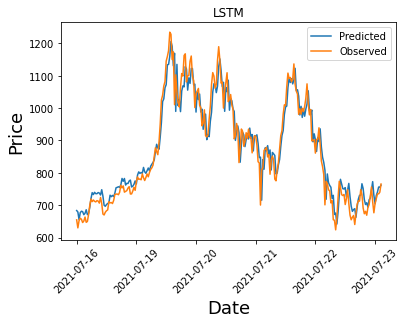

In [ ]:
company_stock.LSTM_model()

Multilayer perceptron (MLP)
R2 SCORE
0.8513290662509578
MSLE
0.004456732362492946


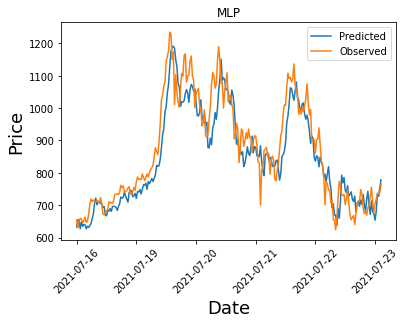

In [ ]:
company_stock.Mlp_model()

Basic Artificial Neural Network (ANN)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               7808      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16,129
Trainable params: 16,129
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


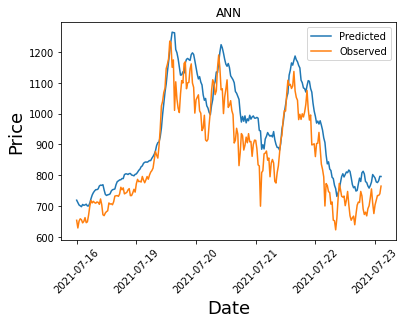

In [ ]:
company_stock.basic_ann_model()

Recurrent neural network (RNN)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 4)                 24        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
71/71 [==============================] - 4s 42ms/step - loss: 0.0217
Epoch 2/5
71/71 [==============================] - 3s 41ms/step - loss: 0.0051
Epoch 3/5
71/71 [==============================] - 3s 41ms/step - loss: 0.0029
Epoch 4/5
71/71 [==============================] - 3s 41ms/step - loss: 0.0023
Epoch 5/5
71/71 [==============================] - 3s 41ms/step - loss: 0.0020
R2 SCORE
-2.8726350391775917

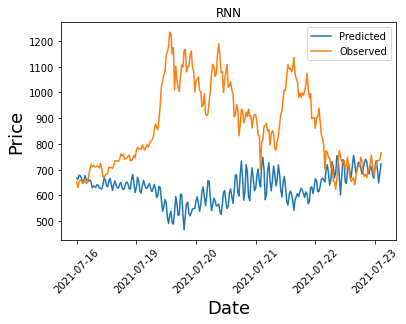

In [ ]:
company_stock.rnn_model()

In [ ]:
company_stock.best_model()

[['LSTM', 0.9363092281252335], ['MLP', 0.8513290662509578], ['ANN', 0.7025681604827119], ['RNN', -2.8726350391775917]]
The best model is  LSTM
Accuracy of  LSTM is 0.9363092281252335


#Conclusion
According to the results shown the LSTM model is good predictor for short future periods but could be more improved by increasing the number of timesteps or by using a more complex model like bidirectional LSTM.

# Model Strengths and Weakness

Advantages of ANN

- It stored the information on the entire network rather than the database.
- After the training of ANN, the data may give the result even with incomplete information.
- If one or more cell is corrupt of ANN, it does not prevent ANN to generate output.
- ANN has distributed memory that helps to generate the desired output.
- ANN can make a machine learnable.
- ANN has a parallel processing capability, which means it can perform more than one task at the same time.

Disadvantages of ANN

- It requires a processor with parallel processing power according to their structure.
- Unexplained behaviour of the network is the main problem of ANN. ANN doesn't give a clue when it produces a probing solution.
- For the determination of the structure of ANN, no specific rules are providing.
- There is no information about the duration of the network.
- It's too typical to show the problem to the network.

The advantages of MLP are:

- Capability to learn non-linear models.
- Capability to learn models in real-time (on-line learning).

The disadvantages of MLP include:

- MLP with hidden layers have a non-convex loss function where there exists more than one local minimum. Therefore different random weight initializations can lead to different validation accuracy.
- MLP requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations.
- MLP is sensitive to feature scaling.

RNN
- RNNs have feedback loops in the recurrent layer. This lets them maintain information in ‘memory’ over time. But, it can be difficult to train standard RNNs to solve problems that require learning long-term temporal dependencies.
- This is because the gradient of the loss function decays exponentially with time (called the vanishing gradient problem).

LSTM
- LSTM networks are a type of RNN that uses special units in addition to standard units. LSTM units include a ‘memory cell’ that can maintain information in memory for long periods of time. This memory cell lets them learn longer-term dependencies.
- LSTMs deal with vanishing and exploding gradient problem by introducing new gates, such as input and forget gates, which allow for a better control over the gradient flow and enable better preservation of “long-range dependencies”.

## References

 - https://www.datacamp.com/tutorial/lstm-python-stock-market
 - https://machinelearningmastery.com/when-to-use-mlp-cnn-and-rnn-neural-networks/
 - https://www.analyticsvidhya.com/blog/2021/05/stock-price-prediction-and-forecasting-using-stacked-lstm/#:~:text=LSTMs%20are%20widely%20used%20for,the%20information%20that%20is%20not.
 - https://towardsdatascience.com/predicting-stock-prices-using-a-keras-lstm-model-4225457f0233
 - Dataset : https://finance.yahoo.com/quote/TSLA/history?period1=1337299200&period2=1659312000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
